In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import sys
import struct
import math
import os

%matplotlib inline

In [2]:
#J1407 data to comapre with other light curves
                         
J1407_Table = Table.read('/disks/strw3/jvilla/Major_JorgeVilla/Scripts/6_Light_Curve/J1407/\
1SWASP_J140747.93-394542.6_lc.tbl', format = 'ascii')

Test = Table.read('/disks/strw3/jvilla/Major_JorgeVilla/Scripts/6_Light_Curve/LCC/\
1SWASP_J114013.43-460457.6_lc.tbl', format = 'ascii')

In [3]:
Test

TMID,FLUX2,FLUX2_ERR,TAMFLUX2,TAMFLUX2_ERR,IMAGEID,CCDX,CCDY,FLAG,HJD,MAG2,MAG2_ERR,TAMMAG2,TAMMAG2_ERR
sec,micro Vega,micro Vega,micro Vega,micro Vega,,1/16 pixel,1/16 pixel,,d,mag,mag,mag,mag
int64,float64,float64,float64,float64,str18,int64,int64,int64,float64,float64,float64,float64,float64
73847210,104.3377,0.2726304,111.3609,0.3703521,227200605041701050,30605,31791,32,2453860.213079,9.953897,0.002836997,9.883168,0.003610837
73847248,104.4133,0.2727889,111.0699,0.4006875,227200605041701420,30600,31797,32,2453860.213519,9.95311,0.002836591,9.886009,0.003916835
73847328,118.9447,0.2569308,111.4985,1.248233,228200605041703020,2677,26447,32,2453860.214444,9.811638,0.002345293,9.881827,0.01215493
73847366,118.457,0.2558903,111.0649,1.317108,228200605041703400,2679,26447,32,2453860.214884,9.816098,0.00234541,9.886058,0.01287569
73847748,104.8382,0.2642101,111.0118,0.411186,227200605041710020,30598,31764,32,2453860.219306,9.948701,0.002736248,9.886578,0.004021564
73847780,104.6102,0.2630702,110.5053,0.4609567,227200605041710340,30594,31769,32,2453860.219676,9.951065,0.002730384,9.891542,0.004529007
73847837,119.1535,0.2501892,111.8889,1.226298,228200605041711320,2696,26437,32,2453860.220336,9.809732,0.002279751,9.878033,0.01189967
73847875,118.6379,0.2496449,111.2468,1.367371,228200605041712100,2697,26435,32,2453860.220775,9.814442,0.002284679,9.884281,0.01334519


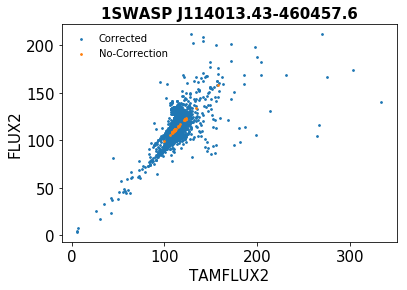

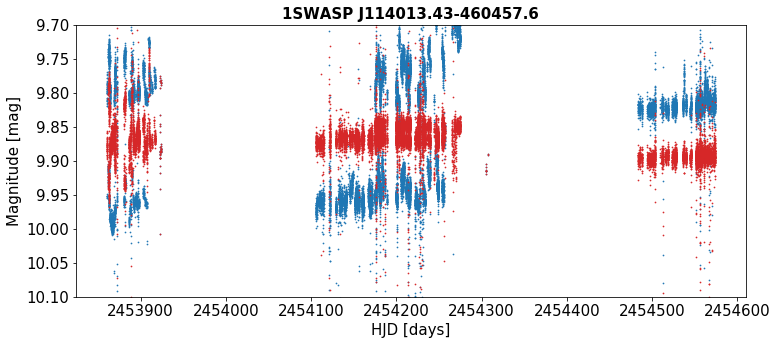

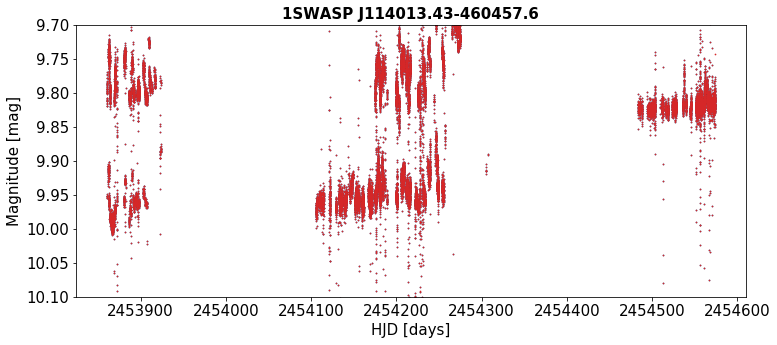

In [4]:
A = Test[np.where(Test['FLAG'] == 32)]
B = Test[np.where(Test['FLAG'] == 0)]
B = np.array(B)

plt.figure()
plt.scatter(A['TAMFLUX2'], A['FLUX2'], s = 3, label = 'Corrected')
plt.scatter(B['TAMFLUX2'], B['FLUX2'], s = 3, label = 'No-Correction')
# plt.ylim(0, 45)
# plt.xlim(0, 45)
plt.xlabel("TAMFLUX2", size = 15)
plt.ylabel("FLUX2", size = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.title("1SWASP J114013.43-460457.6", size = 15, weight = 'semibold')
plt.legend(frameon = False, loc = 'best')
plt.savefig('/disks/strw3/jvilla/Major_JorgeVilla/Scripts/6_Light_Curve/\
J1407/Test_1.png', bbox_inches = 'tight')

J1140   = np.stack(zip(Test['HJD'], Test['MAG2']))
J1140 = J1140[np.where(Test['MAG2_ERR'] < 0.1)]

#To compare if the change in magnitude using TAMFLUX2 is high enough to correct
Mag_New   = 15.0 - 2.5*np.log10(Test['TAMFLUX2'])
J1140_new = np.stack(zip(Test['HJD'], Mag_New))

plt.figure(figsize = (12, 5)) 
plt.scatter(J1140[:,0], J1140[:,1], s = 0.5)
plt.scatter(J1140_new[:,0], J1140_new[:,1], s = 0.5, c = 'C3')
plt.ylim(10.1, 9.7)
plt.xlabel("HJD [days]", size = 15)
plt.ylabel("Magnitude [mag]", size = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.title("1SWASP J114013.43-460457.6", size = 15, weight = 'semibold')
plt.savefig('/disks/strw3/jvilla/Major_JorgeVilla/Scripts/6_Light_Curve/\
J1407/Test_2.png', bbox_inches = 'tight')

Mag_New_2   = 15.0 - 2.5*np.log10(Test['FLUX2'])
J1140_new_2 = np.stack(zip(Test['HJD'], Mag_New_2))

plt.figure(figsize = (12, 5))
plt.scatter(J1140[:,0], J1140[:,1], s = 0.5)
plt.scatter(J1140_new_2[:,0], J1140_new_2[:,1], s = 0.5, c = 'C3')
plt.ylim(10.1, 9.7)
plt.xlabel("HJD [days]", size = 15)
plt.ylabel("Magnitude [mag]", size = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.title("1SWASP J114013.43-460457.6", size = 15, weight = 'semibold')
plt.savefig('/disks/strw3/jvilla/Major_JorgeVilla/Scripts/6_Light_Curve/\
J1407/Test_3.png', bbox_inches = 'tight')

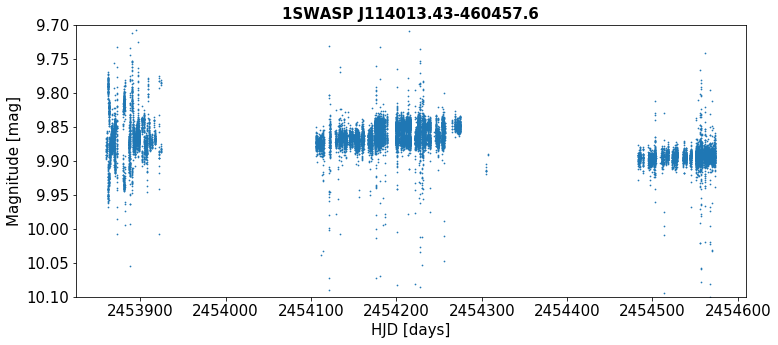

In [5]:
J1140_corr = np.stack(zip(Test['HJD'], Test['TAMMAG2']))

plt.figure(figsize = (12, 5)) 

J1140_corr = J1140_corr[np.where(Test['TAMMAG2_ERR'] < 0.1)]
    
plt.scatter(J1140_corr[:,0], J1140_corr[:,1], s = 0.5)

plt.ylim(10.1, 9.7)
plt.xlabel("HJD [days]", size = 15)
plt.ylabel("Magnitude [mag]", size = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.title("1SWASP J114013.43-460457.6", size = 15, weight = 'semibold')
plt.savefig('/disks/strw3/jvilla/Major_JorgeVilla/Scripts/6_Light_Curve/\
J1407/Test_4.png', bbox_inches = 'tight')

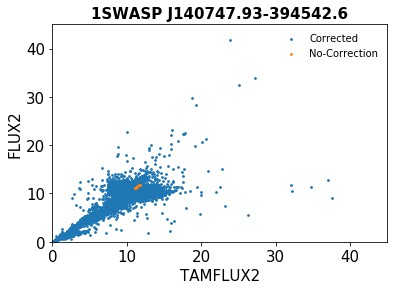

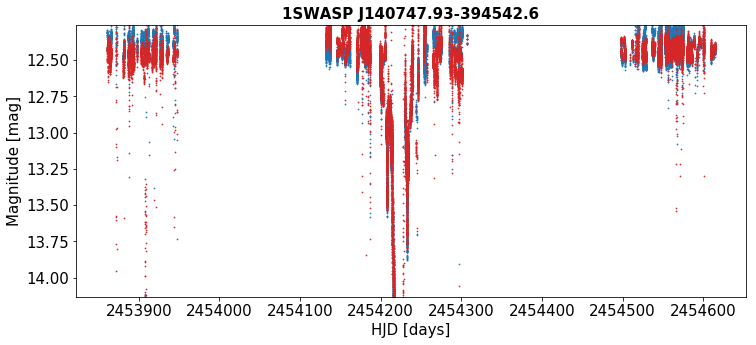

In [6]:
#According to Butters et al., 2017 a flag of 32 indicates that the FLUX2 was corrected 
#because contributions from other cameras were used. Then, it is way better to use 
#TAMFLUX2 which is corrected. If there's no correction a flag of 0 is reported and
#corresponds to a copy of FLUX2.

#The magnbitude is then computed using: mag = 15.0 - 2.5*np.log10(TAMFLUX2)

A = J1407_Table[np.where(J1407_Table['FLAG'] == 32)]
B = J1407_Table[np.where(J1407_Table['FLAG'] == 0)]
B = np.array(B)

plt.figure()
# plt.scatter(J1407_Table['TAMFLUX2'], J1407_Table['FLUX2'], c = J1407_Table['FLAG'], cmap = 'viridis', s = 0.5)
plt.scatter(A['TAMFLUX2'], A['FLUX2'], s = 3, label = 'Corrected')
plt.scatter(B['TAMFLUX2'], B['FLUX2'], s = 3, label = 'No-Correction')
plt.ylim(0, 45)
plt.xlim(0, 45)
plt.xlabel("TAMFLUX2", size = 15)
plt.ylabel("FLUX2", size = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.title("1SWASP J140747.93-394542.6", size = 15, weight = 'semibold')
plt.legend(frameon = False, loc = 'best')
# plt.colorbar()

J1407   = np.stack(zip(J1407_Table['HJD'], J1407_Table['MAG2']))

#To compare if the change in magnitude using TAMFLUX2 is high enough to correct
Mag_New   = 15.0 - 2.5*np.log10(J1407_Table['TAMFLUX2'])
J1407_new = np.stack(zip(J1407_Table['HJD'], Mag_New))

plt.figure(figsize = (12, 5)) 

J1407 = J1407[np.where(J1407_Table['MAG2_ERR'] < 0.1)]
    
plt.scatter(J1407[:,0], J1407[:,1], s = 0.5)
plt.scatter(J1407_new[:,0], J1407_new[:,1], s = 0.5, c = 'C3')
plt.ylim(np.median(J1407[:,1]) + 0.015*np.median(J1407[:,1]) + 1.5, np.median(J1407[:,1]) - 0.015*np.median(J1407[:,1]))
plt.xlabel("HJD [days]", size = 15)
plt.ylabel("Magnitude [mag]", size = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.title("1SWASP J140747.93-394542.6", size = 15, weight = 'semibold')
plt.savefig('/disks/strw3/jvilla/Major_JorgeVilla/Scripts/6_Light_Curve/\
J1407/Test_5.png', bbox_inches = 'tight')

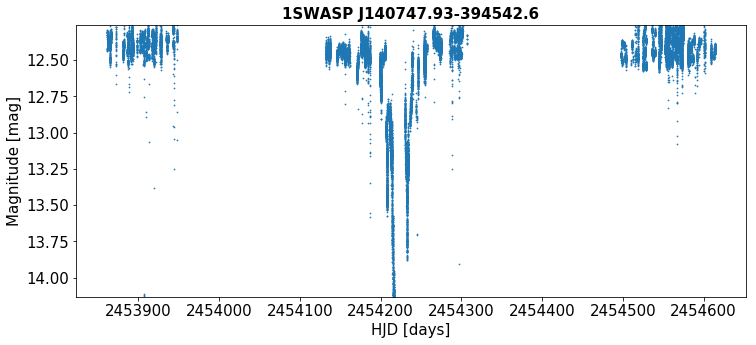

In [7]:
J1407 = np.stack(zip(J1407_Table['HJD'], J1407_Table['MAG2']))

plt.figure(figsize = (12, 5)) 

J1407 = J1407[np.where(J1407_Table['MAG2_ERR'] < 0.1)]
    
plt.scatter(J1407[:,0], J1407[:,1], s = 0.5)

plt.ylim(np.median(J1407[:,1]) + 0.015*np.median(J1407[:,1]) + 1.5, np.median(J1407[:,1]) - 0.015*np.median(J1407[:,1]))
plt.xlabel("HJD [days]", size = 15)
plt.ylabel("Magnitude [mag]", size = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.title("1SWASP J140747.93-394542.6", size = 15, weight = 'semibold')
    
plt.savefig('/disks/strw3/jvilla/Major_JorgeVilla/Scripts/6_Light_Curve/\
J1407/1SWASP_J140747.93-394542.6.png', bbox_inches = 'tight')

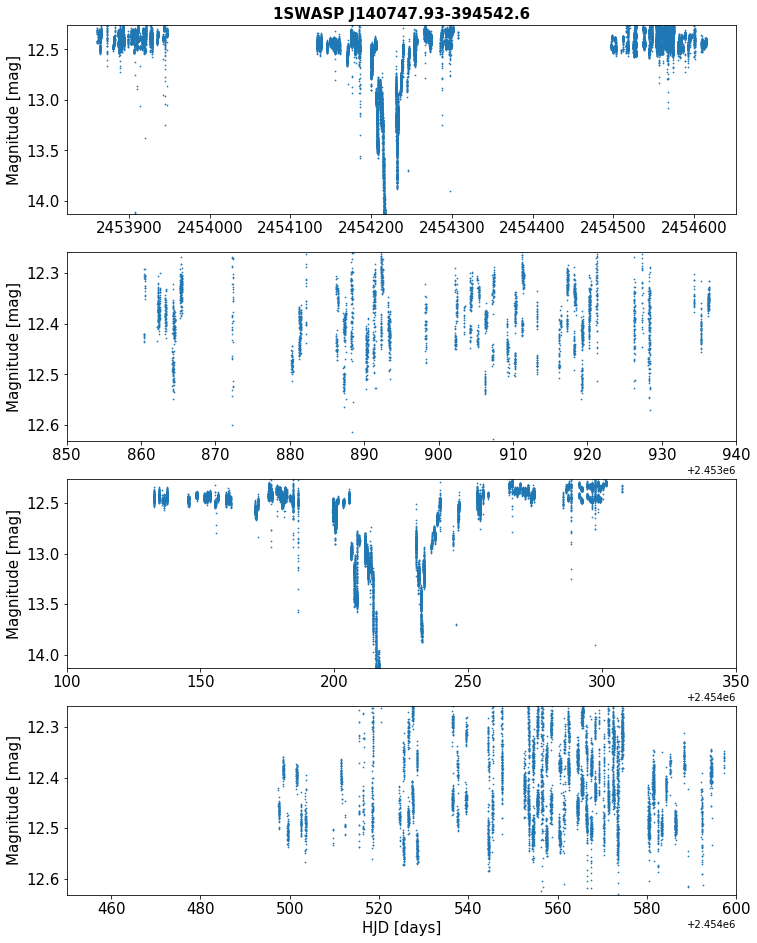

In [8]:
J1407 = np.stack(zip(J1407_Table['HJD'], J1407_Table['MAG2'])) 
J1407 = J1407[np.where(J1407_Table['MAG2_ERR'] < 0.1)]


fig, ((axA), (axB), (axC), (axD)) = plt.subplots(figsize = (12,16), nrows = 4, ncols = 1)

axA.scatter(J1407[:,0], J1407[:,1], s = 0.5)
axA.set_ylim(np.median(J1407[:,1]) + 0.015*np.median(J1407[:,1]) + 1.5, np.median(J1407[:,1]) - 0.015*np.median(J1407[:,1]))
axA.set_ylabel("Magnitude [mag]", size = 15)
axA.tick_params(axis = 'both', which = 'major', labelsize = 15)
axA.set_title("1SWASP J140747.93-394542.6", size = 15, weight = 'semibold')

axB.scatter(J1407[:,0], J1407[:,1], s = 0.5)
axB.set_xlim(2453850, 2453940)
axB.set_ylim(np.median(J1407[:,1]) + 0.015*np.median(J1407[:,1]), np.median(J1407[:,1]) - 0.015*np.median(J1407[:,1]))
axB.set_ylabel("Magnitude [mag]", size = 15)
axB.tick_params(axis = 'both', which = 'major', labelsize = 15)
    
axC.scatter(J1407[:,0], J1407[:,1], s = 0.5)
axC.set_xlim(2454100, 2454350)
axC.set_ylim(np.median(J1407[:,1]) + 0.015*np.median(J1407[:,1]) + 1.5, np.median(J1407[:,1]) - 0.015*np.median(J1407[:,1]))
axC.set_ylabel("Magnitude [mag]", size = 15)
axC.tick_params(axis = 'both', which = 'major', labelsize = 15)    
    
axD.scatter(J1407[:,0], J1407[:,1], s = 0.5)
axD.set_xlim(2454450, 2454600)
axD.set_ylim(np.median(J1407[:,1]) + 0.015*np.median(J1407[:,1]), np.median(J1407[:,1]) - 0.015*np.median(J1407[:,1]))
axD.set_xlabel("HJD [days]", size = 15)
axD.set_ylabel("Magnitude [mag]", size = 15)
axD.tick_params(axis = 'both', which = 'major', labelsize = 15)
    
plt.savefig('/disks/strw3/jvilla/Major_JorgeVilla/Scripts/6_Light_Curve/\
J1407/1SWASP_J140747.93-394542.6_All.png', bbox_inches = 'tight')